# 문제 정의 
- 타이타닉 데이터를 사용해서 생존자와 사망자를 예측해보자
- kaggle 경진대회에서 높은 순위를 차지

# 데이터 수집
- kaggle 사이트로부터 데이터 수집

In [1]:
import pandas as pd
train = pd.read_csv('./data/titanic/train.csv')
test = pd.read_csv('./data/titanic/test.csv')

train.shape, test.shape

((891, 12), (418, 11))

- 분석 feature : Pclass, Age, SibSp, Parch, Fare...
- 예측 target label : Survived

- feature 

<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer 
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string    
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>integer
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>

# 데이터 전처리 

##  정답 컬럼 분리

In [2]:
y_train= train['Survived']

## 결측치 확인
- info()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## PasengerId삭제 

In [5]:
train.drop('PassengerId', axis = 1, inplace = True)
test.drop('PassengerId', axis = 1, inplace = True)

In [6]:
train.shape, test.shape

((891, 11), (418, 10))

## Embarked 채우기 
- 최빈값으로 채우기

In [7]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train['Embarked'].fillna('S', inplace = True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Fare 결측치 채우기 
- 중앙값 또는 평균값으로 채우기

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [11]:
test['Fare'].describe()
# 이상치가 존재하면 이상치의 영향을 덜 받는 중앙값을 사용하는 것이 좋다 

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [12]:
test['Fare'].fillna(14.4542 , inplace = True)

In [13]:
test['Fare'].describe()

count    418.000000
mean      35.576535
std       55.850103
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

## Age 결측치 채우기 
- 다른컬럼과의 상관관계를 통해 데이터 채우기 

In [14]:
# 수치형 칼럼들간에 상관관계를 확인
# + 양의 상관관계 age가 커질 때 Pclass도 커진다 
# - 음의 상관관계 반비례한 상황에 놓여있다
# 0 에 가까울수록 반비례한 건 맞는데 상관관계가 낮다 
# 1에 가까울 수록 비레한데 상관도가 높다 
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


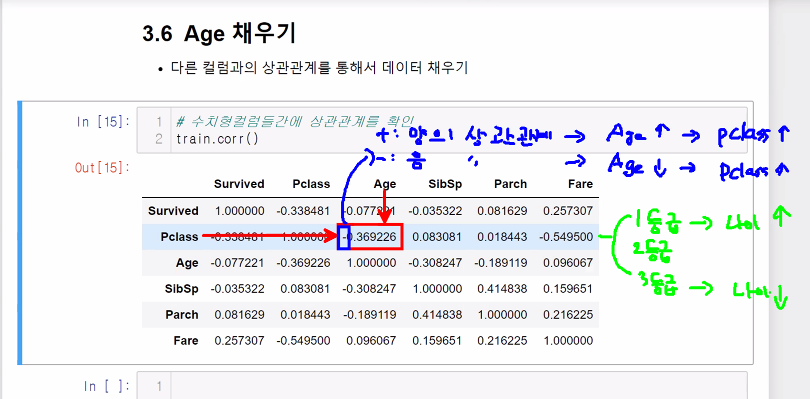

In [15]:
# . groupby(by='Pclass') : 티켓등급이 같은 데이터들끼리 묶음 
age_table = train[['Pclass' ,'Sex', 'Age']].groupby(by = ['Pclass', 'Sex']).median()
age_table

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [16]:
train.iloc[5]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                      NaN
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 5, dtype: object

### age의 결측치를 채우기 

In [17]:
import numpy as np

In [18]:
def fill_age(person):
    if np.isnan(person['Age']):
        return age_table.loc[person['Pclass'], person['Sex']][0]
    else : 
        return person['Age']

In [19]:
# apply : 행이나 열별로 데이터를 뽑아주는 지정해둔 함수에 적용 
train['Age'] = train.apply(fill_age, axis = 1)

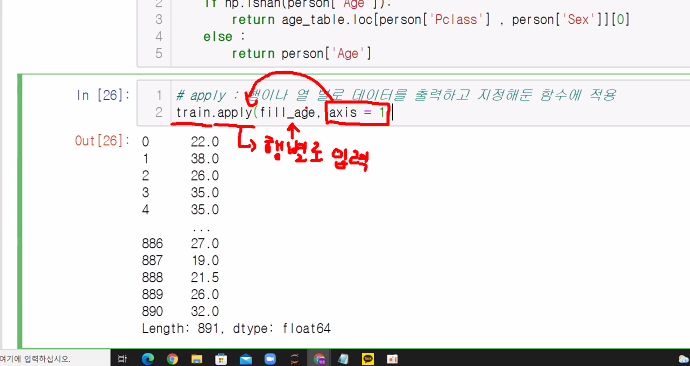

In [20]:
test['Age'] = test.apply(fill_age, axis = 1)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Cabin 결측치 채우기 
- 결측치의 비율이 너무 높기 때문에 결측치 자체를 하나의 데이터로 활용

In [22]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]

In [24]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [25]:
train['Cabin'].fillna('N', inplace=True)
test['Cabin'].fillna('N' , inplace = True)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# 탐색적 데이터분석 

In [27]:
# 시각화 라이브러리
import seaborn as sns

<AxesSubplot:xlabel='Cabin', ylabel='count'>

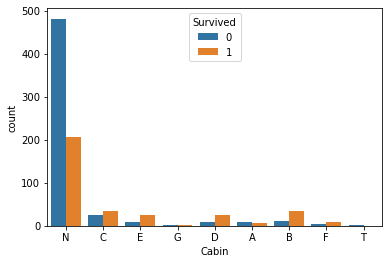

In [28]:
sns.countplot(data = train , x = 'Cabin' , hue = 'Survived')

- N에서 사망한 사람의 비율이 높다.
- 임의로 채운 N 값을 분석에 사용해도 괜찮을듯 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

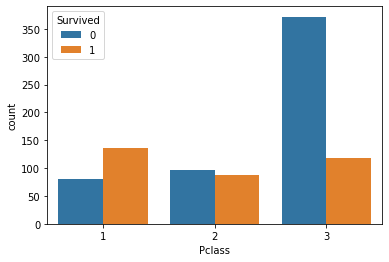

In [29]:
sns.countplot(data = train, x = 'Pclass' , hue = 'Survived')

## Embarked 와 Pclass 시각화 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

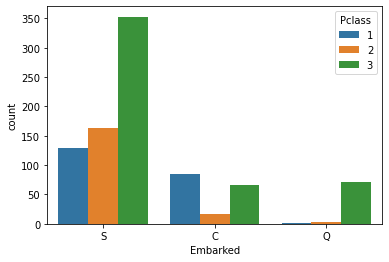

In [30]:
sns.countplot(data = train, x = 'Embarked' , hue = 'Pclass')

## Sex, Age, Survived 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

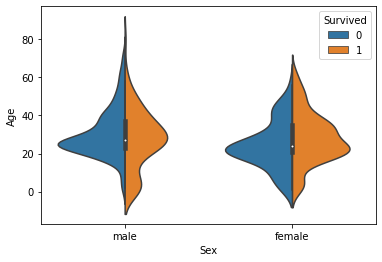

In [31]:
sns.violinplot(data = train, x = 'Sex', y = 'Age', hue = 'Survived', split = True )

## Sibsp, Parch 시각화 
- 특성공학 : 컬럼에 연산을 통해서 의미있는 새로운 정보를 추출하는 행위
- SibSp + Parch + 1 = Family_size 컬럼 생성

In [32]:
train['Family_size'] = train['SibSp'] +train['Parch']+1

In [33]:
test['Family_size'] = test['SibSp'] +test['Parch']+1

<AxesSubplot:xlabel='Family_size', ylabel='count'>

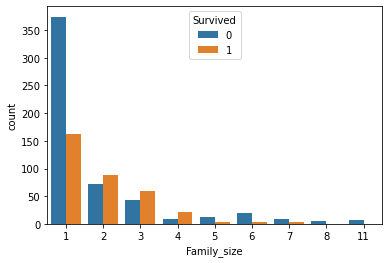

In [34]:
sns.countplot(data = train, x = 'Family_size' , hue = 'Survived')

In [35]:
# 구간에 대한 정보 0초과 1 이하 -> alone
# 1초과 4 이하 -> small
# 4초과 20 이하 -> large
bins = [0, 1, 4 ,20]
#  구간에 대한 범주 이름 
labels = ['Alone', 'Small', 'Large']

In [36]:
train['Family_group'] = pd.cut(train['Family_size'], bins = bins, labels = labels)
test['Family_group'] = pd.cut(test['Family_size'], bins = bins, labels = labels)

In [37]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,2,Small
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Small
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Small
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1,Alone


### Family_group 시각화 

<AxesSubplot:xlabel='Family_group', ylabel='count'>

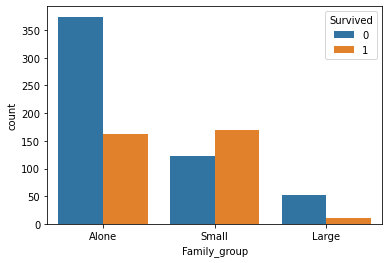

In [38]:
sns.countplot(data = train, x = 'Family_group', hue = 'Survived')

In [39]:
train.info()
# Name, Ticket, Sex, Cabin, Embarked 등   object에 다양한 종류가 있다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         891 non-null    object  
 10  Embarked      891 non-null    object  
 11  Family_size   891 non-null    int64   
 12  Family_group  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


## Text 데이터 
- Name, Ticket
- 비정형 데이터 (사용하는 단어나 길이가 전부 다름)
- 비정형 데이터를 정형데이터로 변경해서 사용할 수 있게하자 

In [40]:
train['Name'][0].split(',')[1].split('.')[0].strip()

'Mr'

### Name 전처리 함수 만들기

In [41]:
def split_name(name):
    return name.split(',')[1].split('.')[0].strip()

In [42]:
train['Name'] = train['Name'].apply(split_name)
test['Name'] = test['Name'].apply(split_name)

In [43]:
train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [44]:
# 라벨링 
convert_title_dic = {
    'Mr' : 'Mr' , 
    'Mrs' : 'Mrs', 
    'Miss' : 'Miss', 
    'Master' : 'Master', 
    'Don' : 'Other', 
    'Rev' : 'Rev', 
    'Dr': 'Dr', 
    'Mme' : 'Other', 
    'Ms' : 'Other',
    'Major' : 'Other',
    'Lady' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other', 
    'Capt' : 'Other', 
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'
}

In [45]:
train['Name'] = train['Name'].map(convert_title_dic)

In [46]:
# Nmae로 오타가 나있었어요
test['Name'] = test['Name'].map(convert_title_dic)

In [47]:
train['Name'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      14
Dr          7
Rev         6
Name: Name, dtype: int64

### Ticket 전처리 

In [48]:
len(train['Ticket'].unique())

681

In [49]:
train.drop('Ticket', axis = 1, inplace = True)
test.drop('Ticket' , axis =1 , inplace = True)

In [50]:
train.shape, test.shape

((891, 12), (418, 11))

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Fare          891 non-null    float64 
 8   Cabin         891 non-null    object  
 9   Embarked      891 non-null    object  
 10  Family_size   891 non-null    int64   
 11  Family_group  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


## 글자 데이터를 숫자 데이터로 변환
- 원핫 인코딩
- Name, Sex, Cabin, Embarked, Family_group

In [52]:
categorical_feature = ['Name', 'Sex', 'Cabin', 'Embarked', 'Family_group']

In [53]:
train.drop('Survived', axis = 1, inplace = True)

In [54]:
combined = pd.concat([train, test], ignore_index = True)

In [55]:
train

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size,Family_group
0,3,Mr,male,22.0,1,0,7.2500,N,S,2,Small
1,1,Mrs,female,38.0,1,0,71.2833,C,C,2,Small
2,3,Miss,female,26.0,0,0,7.9250,N,S,1,Alone
3,1,Mrs,female,35.0,1,0,53.1000,C,S,2,Small
4,3,Mr,male,35.0,0,0,8.0500,N,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...
886,2,Rev,male,27.0,0,0,13.0000,N,S,1,Alone
887,1,Miss,female,19.0,0,0,30.0000,B,S,1,Alone
888,3,Miss,female,21.5,1,2,23.4500,N,S,4,Small
889,1,Mr,male,26.0,0,0,30.0000,C,C,1,Alone


In [56]:
combined

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size,Family_group
0,3,Mr,male,22.0,1,0,7.2500,N,S,2,Small
1,1,Mrs,female,38.0,1,0,71.2833,C,C,2,Small
2,3,Miss,female,26.0,0,0,7.9250,N,S,1,Alone
3,1,Mrs,female,35.0,1,0,53.1000,C,S,2,Small
4,3,Mr,male,35.0,0,0,8.0500,N,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,25.0,0,0,8.0500,N,S,1,Alone
1305,1,Other,female,39.0,0,0,108.9000,C,C,1,Alone
1306,3,Mr,male,38.5,0,0,7.2500,N,S,1,Alone
1307,3,Mr,male,25.0,0,0,8.0500,N,S,1,Alone


In [57]:
#원핫인코딩
one_hot = pd.get_dummies( combined[categorical_feature] )
one_hot.shape

(1309, 24)

In [58]:
combined.drop(categorical_feature , axis=1 , inplace= True)

In [59]:
combined = pd.concat([combined, one_hot], axis= 1)

In [60]:
combined.shape

(1309, 30)

# 모델선택 및 하이퍼파라미터 튜닝


## 데이터 나누기  

In [61]:
X_train = combined.iloc[:891]
X_test = combined.iloc[891:]

In [62]:
X_train.shape, X_test.shape, y_train.shape

((891, 30), (418, 30), (891,))

## 모델 불러오기 

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
tree_model = DecisionTreeClassifier()

In [65]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
pre = tree_model.predict(X_test)

In [67]:
pre

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [68]:
gender_sub = pd.read_csv('./data/titanic/gender_submission.csv')
gender_sub['Survived'] = pre # tree 모델의 예측 결과를 제출양식에 담기
gender_sub.to_csv('mysub01.csv ' , index =False) #csv 파일로 뽑아내기

## 교차검증 

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
result = cross_val_score(tree_model, X_train, y_train, cv =5)
result.mean()

0.7901198920343984

In [71]:
tree_model.score(X_train, y_train)

0.9865319865319865

## RandomForest 

In [72]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200) #200개의 decisionTree사용

In [73]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [74]:
result = cross_val_score(forest, X_train, y_train , cv=5)
result.mean()

0.8013307388111229

In [103]:
forest.feature_importances_

array([0.05424892, 0.20273994, 0.0247537 , 0.01838678, 0.20366745,
       0.0338855 , 0.00153718, 0.01222882, 0.02389549, 0.09121632,
       0.01973846, 0.00290886, 0.00231518, 0.08153603, 0.0892099 ,
       0.00245396, 0.0070496 , 0.00677345, 0.00700191, 0.00972684,
       0.00153819, 0.00115437, 0.0267107 , 0.00028095, 0.01271425,
       0.00768701, 0.01345466, 0.00754432, 0.01858786, 0.01505344])

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# 특성 중요도 시각화 하기
def plot_feature_importances(model, n_features):
    # 축 번호별로 중요도 그래프를 그림
    plt.barh(range(n_features), model.feature_importances_)
    # 축 번호에 축 이름을 출력
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
plt.show()

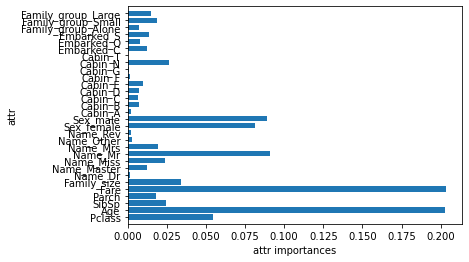

In [106]:
plot_feature_importances(forest, X_train.shape[1])

## Adaboost 

In [112]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier

In [113]:
adaboost = AdaBoostClassifier(n_estimators=200)
gradient = GradientBoostingClassifier(n_estimators=200)

In [114]:
adaboost.fit(X_train, y_train)
gradient.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [115]:
result= cross_val_score(adaboost, X_train, y_train, cv=5)
result.mean()

result = cross_val_score(gradient, X_train, y_train, cv=5)
result.mean()

0.8406251961584331

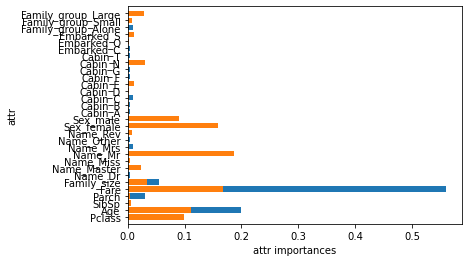

In [116]:
plot_feature_importances(adaboost, X_train.shape[1])
plot_feature_importances(gradient, X_train.shape[1])

# 데이터 스케일링 

In [76]:
from sklearn.preprocessing import RobustScaler,StandardScaler

In [77]:
rb_scaler = RobustScaler()

In [81]:
# 스케일러를 통해서 값의 범위를 변경
# 어떤 컬럼에는 어떤 값으로 변경해야하는지 
rb_scaler.fit(X_train)

RobustScaler()

In [84]:
X_train_rb = rb_scaler.transform(X_train)
X_test_rb = rb_scaler.transform(X_test)

In [85]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Family_size,Name_Dr,Name_Master,Name_Miss,Name_Mr,...,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family_group_Alone,Family_group_Small,Family_group_Large
0,3,22.0,1,0,7.2500,2,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,1,38.0,1,0,71.2833,2,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,26.0,0,0,7.9250,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,2,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,3,35.0,0,0,8.0500,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


In [86]:
X_train_rb[:5]

array([[ 0.        , -0.27586207,  1.        ,  0.        , -0.3120106 ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -1.        ,  1.        ,  0.        ],
       [-2.        ,  0.82758621,  1.        ,  0.        ,  2.46124229,
         1.        ,  0.        ,  0.        ,  0.        , -1.        ,
         1.        ,  0.        ,  0.        ,  1.        , -1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        , -1.        ,  0.        ,  1.        ,
         0.        , -1.        , -1.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.28277666,
         0.        ,  0.        ,  0.        ,  1

## RandomForest 모델 확인 

In [88]:
result = cross_val_score(forest, X_train_rb, y_train, cv = 5)
result.mean()

0.8001945891657775

In [90]:
result = cross_val_score(forest, X_train, y_train, cv = 5)
result.mean()

0.800207143305505

## standard 모델 확인 

In [97]:
st_scaler = StandardScaler()

In [98]:
st_scaler.fit(X_train)

StandardScaler()

In [99]:
X_train_st = st_scaler.transform(X_train)
X_test_st = st_scaler.transform(X_test)

In [100]:
result = cross_val_score(forest, X_train, y_train, cv = 5)
result.mean()

0.8002134203753688

In [101]:
result = cross_val_score(forest, X_train_rb, y_train, cv = 5)
result.mean()

0.7968363567886511

## KNN 모델 확인 

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [95]:
result = cross_val_score(forest, X_train, y_train, cv = 5)
result.mean()

0.8013244617412593

In [96]:
result = cross_val_score(forest, X_train_rb, y_train, cv = 5)
result.mean()

0.8024417801770134

# Ensemble 모델 
- 여러모델을 사용해서 판단하면 더 판단을 잘한다 
- 여러 모델은 각각 다른 판단을 하는게 좋음 
- Baggin(RandomForest), Boosting(GBM,Adaboost,LGBM, XGBoost) > 각각 같은 모델을 다른 방법으로 판단하게 만드는 방법 